#***ADHD PREDICTION USING MACHINE LEARNING ALGORITHMS***

---
#**Table of Contents**
---

**01.** [**Introduction**](#Section1)<br>
**02.** [**Problem Statement**](#Section2)<br>
**03.** [**Importing Libraries**](#Section3)<br>
**04.** [**Data Acquisition & Description**](#Section4)<br>

   - **4.1** [**ADHD Data & its Description**](#Section41)
   - **4.2** [**Control Healthy Data & its Description**](#Section42)

**05.** [**Data cleaning & Pre-processing**](#Section5)<br>
**06.** [**Exploratory Data Analysis**](#Section6)<br>
**07.** [**Data Preparation for algorithms**](#Section7)<br>
**08.** [**Model Development & Evaluation**](#Section8)<br>
**09.** [**Saving the Machine Learning model**](#Section9)<br>
**10.** [**Conclusion**](#Section10)<br>

---
<a name = Section1></a>
#**01. Introduction**
---

- **Attention deficit hyperactivity disorder (ADHD)** is a disease group related to various dysfunctions. There are two different words in the name of this disorder, and each of them is responsible for a specific symptom of ADHD. 
    - The first group of patients with attention deficit can **rarely focus on a unique topic**, and anything surrounding them in their environment can **distract them quickly**.
    - The second group is related to hyperactivity symptoms, where they can **tolerate a static situation** and intend so much to alter their posture and position, in some cases, **they may shout or keep silence suddenly** in a regular discussion. All these conditions can happen for children in different stages of growth.



- Based on the **Centers for Disease Control and Prevention (CDC)** statistics in 2016, over **6.1 million children** in the age group of 4– 17 years have been diagnosed with ADHD. Overall, patients can be categorized into three different stages of ages-
    - The children in a range of 2–5 years are 388 thousand, 
    - The children in the age of 6– 11 are 4 million, 
    - Tnd the rest are in the range of 12–17 years old.

- According to the **National Institute of Mental Health (NIMH)**, around 70% of children with ADHD continue to have some **hyperactivity and impulsivity during their adolescence and adulthood**. Long-term follow-up studies from childhood to adulthood revealed that children with ADHD, compared with those without ADHD, were more involved in psychosocial, educational, and neuropsychological functioning and had higher risks for **antisocial disorders, major depression, and anxiety disorders** as adults.

- With the development of medical technologies and the application of various analytical tools, research to extract the brain’s function- ality during ADHD, its electrical patterns and connectivity are on the rise. In recent years, many researchers have focused their attention on using different neuroimaging modalities and biomedical signal processing techniques to determine the behavior and origin of ADHD as early as possible. Although finding out the mechanism and causality seems slow, the recognizance techniques are improving fast, but it should be mentioned that some clinical assessments such as The **Diagnostic and Statistical Manual of Mental Disorders (DSM)**, and **International Classification of Diseases (ICD)** were introduced. Nevertheless, the diagnosis procedure is time-consuming and subjective therefore, the results can easily vary from one case to another.


---
<a name = Section2></a>
#**02. Problem Statement**
---

- **Introducing a biomarker that uses individual's characteristics and performs fast and accurately can play a beneficial role in ADHD.**
- So i m predicting the chances of ADHD in children using Machine Learning Algorithms having high accuracy.

---
<a name = Section3></a>
# **03. Installing & Importing Libraries**
---

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report, accuracy_score

---
<a name = Section4></a>
# **04. Data Acquisition & Description**
---

<a name = Section41></a>
### **4.1 ADHD Data**

- In this section we will import three different child data file (v1p.csv, v3p.csv & v6p.csv) and combine it into a single data file (combined_ADHD.csv) and see some observations.

In [ ]:
# Read in the ADHD data from each CSV file
df1 = pd.read_csv('/content/ADHD/v1p.csv')
df2 = pd.read_csv('/content/ADHD/v3p.csv')
df3 = pd.read_csv('/content/ADHD/v6p.csv')

# Concatenate the DataFrames into a single DataFrame
combined_df_ADHD = pd.concat([df1, df2, df3])

# Write the combined DataFrame to a new CSV file
combined_df_ADHD.to_csv('combined_ADHD.csv', index=False)

In [ ]:
# Reading the ADHD data
df_ADHD = pd.read_csv('/content/combined_ADHD.csv')

# # Print the first five row
df_ADHD.head()

Unnamed: 0    0    1    2    3    4    5    6    7    8     9   10   11  \
0           0   85 -407  200  191  420  457  310  310   16  1009  531  126   
1           1 -266  -55  -20  367  163  384  -20  310  494  1193  494  236   
2           2  -90  -19  126  437  420  568  347  457 -131  1156  384  384   
3           3  -90 -160  163  473  384  494  310  384  457  1340  494  420   
4           4 -301 -336  -20  473  200  531   89  420  200  1156  310  494   

    12   13   14   15   16   17   18  
0  457  200  457  384  -90  473  121  
1  236  310  200  457 -195  543   15  
2  494  384  494  531  -19  613  261  
3  310  420  273  531  -90  437  -19  
4  273  457  236  568 -160  578  121

In [ ]:
# Print the dimension of data
df_ADHD.shape

(63389, 20)

In [ ]:
df_ADHD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63389 entries, 0 to 63388
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  63389 non-null  int64
 1   0           63389 non-null  int64
 2   1           63389 non-null  int64
 3   2           63389 non-null  int64
 4   3           63389 non-null  int64
 5   4           63389 non-null  int64
 6   5           63389 non-null  int64
 7   6           63389 non-null  int64
 8   7           63389 non-null  int64
 9   8           63389 non-null  int64
 10  9           63389 non-null  int64
 11  10          63389 non-null  int64
 12  11          63389 non-null  int64
 13  12          63389 non-null  int64
 14  13          63389 non-null  int64
 15  14          63389 non-null  int64
 16  15          63389 non-null  int64
 17  16          63389 non-null  int64
 18  17          63389 non-null  int64
 19  18          63389 non-null  int64
dtypes: int64(20)
memory usage: 9

In [ ]:
df_ADHD.describe()

Unnamed: 0             0             1             2             3  \
count  63389.000000  63389.000000  63389.000000  63389.000000  63389.000000   
mean   12506.340185    138.229866    138.519096    143.796274    137.485273   
std     8982.342349    380.109505    385.883092    218.510768    194.237146   
min        0.000000  -3117.000000 -13224.000000  -2817.000000 -13237.000000   
25%     5282.000000     15.000000     15.000000     16.000000     50.000000   
50%    10564.000000    156.000000    156.000000    126.000000    121.000000   
75%    17722.000000    261.000000    261.000000    236.000000    226.000000   
max    33569.000000  13813.000000   4133.000000   5018.000000   3007.000000   

                  4             5             6             7             8  \
count  63389.000000  63389.000000  63389.000000  63389.000000  63389.000000   
mean     144.231113    143.686412    144.199009    143.256701    143.210242   
std      188.484318    167.471686    196.105271    175.484477    181.159426   
min     -903.000000  -3553.000000   -867.000000  -2964.000000  -1529.000000   
25%       16.000000     52.000000     16.000000     52.000000     52.000000   
50%      126.000000    126.000000    126.000000    126.000000    126.000000   
75%      273.000000    236.000000    273.000000    236.000000    236.000000   
max     5430.000000   5018.000000   5020.000000   5020.000000   5020.000000   

                  9            10           11            12            13  \
count  63389.000000  63389.000000  63389.00000  63389.000000  63389.000000   
mean     142.601745    142.971367    141.11969    142.563520    140.472795   
std      287.704625    165.561067    138.67481    152.571464    168.683765   
min    -3921.000000  -2854.000000  -3516.00000  -1823.000000  -3295.000000   
25%       52.000000     52.000000     52.00000     52.000000     52.000000   
50%      126.000000    126.000000    126.00000    126.000000    126.000000   
75%      236.000000    236.000000    200.00000    200.000000    236.000000   
max     5016.000000   5020.000000   5016.00000   5020.000000   5016.000000   

                 14            15            16            17            18  
count  63389.000000  63389.000000  63389.000000  63389.000000  63389.000000  
mean     142.159349    140.335042    133.949770    133.395889    133.789569  
std      153.589062    145.201828    259.874447    173.056640    191.743789  
min    -1051.000000  -3406.000000  -3751.000000  -3258.000000   -864.000000  
25%       52.000000     89.000000     15.000000     15.000000     15.000000  
50%      126.000000    126.000000    121.000000    121.000000    121.000000  
75%      200.000000    200.000000    226.000000    226.000000    226.000000  
max     5016.000000   5016.000000   4802.000000   4802.000000   4802.000000

<a name = Section42></a>
### **4.2 Control Healthy Data**

- In this section we will import three different child data file (v41p.csv, v42p.csv & v43p.csv) and combine it into a single data file (combined_control.csv) and see some observations.

In [ ]:
# Read in the Control data from each CSV file
df4 = pd.read_csv('/content/Control/v41p.csv')
df5 = pd.read_csv('/content/Control/v42p.csv')
df6 = pd.read_csv('/content/Control/v43p.csv')

# Concatenate the DataFrames into a single DataFrame
combined_df_control = pd.concat([df4, df5, df6])

# Write the combined DataFrame to a new CSV file
combined_df_control.to_csv('combined_Control.csv', index=False)

In [ ]:
# Reading the Control data
df_control = pd.read_csv('/content/combined_Control.csv')

# Print the first five row
df_control.head()

Unnamed: 0      0      1      2      3      4      5      6      7      8  \
0           0  367.0  156.0  310.0  156.0  384.0  163.0  420.0  200.0  420.0   
1           1  473.0   85.0  531.0  226.0  494.0  163.0  494.0   52.0  531.0   
2           2  402.0  -19.0  531.0   85.0  457.0  -20.0  420.0 -241.0  347.0   
3           3  332.0   50.0  457.0  191.0  384.0  -20.0  273.0 -388.0  310.0   
4           4  437.0  121.0  568.0  261.0  494.0   52.0  384.0 -315.0  384.0   

       9     10     11     12     13     14     15     16     17     18  
0  273.0  310.0  200.0  384.0  200.0  384.0  163.0  367.0  156.0  508.0  
1  163.0  604.0  200.0  568.0  236.0  568.0  163.0  508.0   85.0  402.0  
2  -57.0  457.0   89.0  457.0  126.0  457.0  -57.0  332.0   15.0  226.0  
3 -241.0  494.0  163.0  494.0  163.0  420.0 -131.0  473.0   50.0   15.0  
4  -57.0  494.0  126.0  568.0  200.0  568.0  -20.0  402.0  -19.0   85.0

In [ ]:
# Print the dimension of data
df_control.shape

(41954, 20)

In [ ]:
df_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41954 entries, 0 to 41953
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  41954 non-null  int64  
 1   0           41954 non-null  float64
 2   1           41954 non-null  float64
 3   2           41954 non-null  float64
 4   3           41954 non-null  float64
 5   4           41954 non-null  float64
 6   5           41954 non-null  float64
 7   6           41954 non-null  float64
 8   7           41954 non-null  float64
 9   8           41954 non-null  float64
 10  9           41954 non-null  float64
 11  10          41954 non-null  float64
 12  11          41954 non-null  float64
 13  12          41954 non-null  float64
 14  13          41954 non-null  float64
 15  14          41954 non-null  float64
 16  15          41954 non-null  float64
 17  16          41954 non-null  float64
 18  17          41954 non-null  float64
 19  18          41954 non-nul

In [ ]:
df_control.describe()

Unnamed: 0             0             1             2             3  \
count  41954.000000  41954.000000  41954.000000  41954.000000  41954.000000   
mean    7124.400081    138.978834    139.647829    145.664084    139.765314   
std     4272.370772    327.917483    458.955334    279.748492    413.727959   
min        0.000000  -2941.000000  -3751.000000  -2486.000000  -3680.000000   
25%     3496.000000    -55.000000    -19.000000    -20.000000    -19.000000   
50%     6992.000000    121.000000    121.000000    126.000000    121.000000   
75%    10488.000000    332.000000    297.000000    310.000000    297.000000   
max    16703.000000   3113.000000   4802.000000   3401.000000   4802.000000   

                  4             5             6             7             8  \
count  41954.000000  41954.000000  41954.000000  41954.000000  41954.000000   
mean     145.659174    146.265886    145.634886    145.793250    145.693641   
std      254.980925    410.824660    273.546237    409.881249    276.832193   
min    -2780.000000  -3921.000000  -2633.000000  -3884.000000  -2449.000000   
25%       16.000000     16.000000    -20.000000     16.000000     16.000000   
50%      126.000000    126.000000    126.000000    126.000000    126.000000   
75%      273.000000    273.000000    310.000000    273.000000    273.000000   
max     3217.000000   4064.000000   3254.000000   3916.000000   3144.000000   

                  9            10            11            12            13  \
count  41954.000000  41954.000000  41954.000000  41954.000000  41954.000000   
mean     146.513992    145.897578    146.463508    146.069338    146.626210   
std      440.537020    268.159357    387.991729    250.874444    401.839048   
min    -3847.000000  -2670.000000  -3884.000000  -2633.000000  -3884.000000   
25%      -20.000000    -20.000000     16.000000     16.000000     16.000000   
50%      126.000000    126.000000    126.000000    126.000000    126.000000   
75%      310.000000    310.000000    236.000000    273.000000    236.000000   
max     3916.000000   3622.000000   4064.000000   3291.000000   4100.000000   

                 14            15            16            17            18  
count  41954.000000  41954.000000  41954.000000  41954.000000  41954.000000  
mean     146.168518    146.453425    140.254970    140.742170    140.291486  
std      237.227749    387.371555    258.548188    394.444724    235.409666  
min    -2927.000000  -3847.000000  -2307.000000  -3715.000000  -2519.000000  
25%       16.000000     52.000000    -19.000000     15.000000     15.000000  
50%      163.000000    126.000000    156.000000    121.000000    156.000000  
75%      273.000000    236.000000    297.000000    261.000000    261.000000  
max     3548.000000   3990.000000   3042.000000   3887.000000   3042.000000

---
<a name = Section5></a>
# **05. Data cleaning & Pre-Processing**
---

In [ ]:
# Add a new column with a value of 0 in all rows of ADHD Data
df_ADHD['result'] = 0

# Write the updated DataFrame to the same CSV file
df_ADHD.to_csv('combined_ADHD.csv', index=False)

df_ADHD.head()

Unnamed: 0    0    1    2    3    4    5    6    7    8  ...   10   11  \
0           0   85 -407  200  191  420  457  310  310   16  ...  531  126   
1           1 -266  -55  -20  367  163  384  -20  310  494  ...  494  236   
2           2  -90  -19  126  437  420  568  347  457 -131  ...  384  384   
3           3  -90 -160  163  473  384  494  310  384  457  ...  494  420   
4           4 -301 -336  -20  473  200  531   89  420  200  ...  310  494   

    12   13   14   15   16   17   18  result  
0  457  200  457  384  -90  473  121       0  
1  236  310  200  457 -195  543   15       0  
2  494  384  494  531  -19  613  261       0  
3  310  420  273  531  -90  437  -19       0  
4  273  457  236  568 -160  578  121       0  

[5 rows x 21 columns]

In [ ]:
# Print the dimension of data
df_ADHD.shape

(63389, 21)

In [ ]:
# Add a new column with a value of 1 in all rows Control healthy data
df_control['result'] = 1

# Write the updated DataFrame to the same CSV file
df_control.to_csv('combined_Control.csv', index=False)

df_control.head()

Unnamed: 0      0      1      2      3      4      5      6      7      8  \
0           0  367.0  156.0  310.0  156.0  384.0  163.0  420.0  200.0  420.0   
1           1  473.0   85.0  531.0  226.0  494.0  163.0  494.0   52.0  531.0   
2           2  402.0  -19.0  531.0   85.0  457.0  -20.0  420.0 -241.0  347.0   
3           3  332.0   50.0  457.0  191.0  384.0  -20.0  273.0 -388.0  310.0   
4           4  437.0  121.0  568.0  261.0  494.0   52.0  384.0 -315.0  384.0   

   ...     10     11     12     13     14     15     16     17     18  result  
0  ...  310.0  200.0  384.0  200.0  384.0  163.0  367.0  156.0  508.0       1  
1  ...  604.0  200.0  568.0  236.0  568.0  163.0  508.0   85.0  402.0       1  
2  ...  457.0   89.0  457.0  126.0  457.0  -57.0  332.0   15.0  226.0       1  
3  ...  494.0  163.0  494.0  163.0  420.0 -131.0  473.0   50.0   15.0       1  
4  ...  494.0  126.0  568.0  200.0  568.0  -20.0  402.0  -19.0   85.0       1  

[5 rows x 21 columns]

In [ ]:
# Print the dimension of data
df_control.shape

(41954, 21)

In [ ]:
# Read in the data from both ADHD & Control Healthy CSV files
df7 = pd.read_csv('/content/combined_ADHD.csv')
df8 = pd.read_csv('/content/combined_Control.csv')

# Combine the DataFrames into a single DataFrame
combined_df_data = pd.concat([df7, df8])

# Shuffle the rows of the combined DataFrame
combined_df_data = combined_df_data.sample(frac=1, random_state=1234)

# Write the shuffled DataFrame to a new CSV file
combined_df_data.to_csv('combined_data.csv', index=False)

In [ ]:
# Reading the Combine data
df = pd.read_csv('/content/combined_data.csv')

# Print the first ten row
df.head(10)

Unnamed: 0      0      1      2      3      4      5      6      7      8  \
0        8059 -160.0   85.0   16.0  226.0  -20.0  347.0   52.0  310.0   89.0   
1       14168  613.0  437.0  163.0  261.0 -131.0  163.0 -167.0  200.0  -57.0   
2        6560 -583.0  437.0 -241.0  -55.0  -20.0  126.0 -278.0   52.0  -94.0   
3       15506   85.0   50.0   16.0  -19.0  163.0   16.0  200.0  163.0  163.0   
4       15750  367.0   85.0  310.0  -55.0  420.0 -315.0  236.0  -94.0  236.0   
5        4454  121.0  156.0   89.0  121.0  126.0  -20.0   16.0 -131.0  163.0   
6       21191  649.0  649.0  310.0  261.0   89.0  163.0  126.0   52.0  126.0   
7        4031  -55.0 -125.0   16.0  -19.0  126.0  200.0  163.0 -131.0  126.0   
8         410  -90.0   85.0   89.0  156.0   89.0  273.0  200.0  384.0   89.0   
9        7522 -195.0  -19.0 -131.0 -125.0  -94.0   52.0 -131.0   52.0  -20.0   

   ...     10     11     12     13     14     15     16     17     18  result  
0  ...  -94.0  126.0  -57.0  163.0  -94.0  200.0  121.0  297.0  191.0       1  
1  ...  457.0   52.0  236.0  236.0  -20.0  347.0  -19.0  156.0  -55.0       0  
2  ...   52.0   16.0  -57.0  126.0   52.0  126.0 -371.0  226.0   15.0       0  
3  ...   52.0   16.0   89.0  -20.0   89.0   89.0  -19.0  191.0  191.0       0  
4  ...  310.0  -57.0  347.0  -94.0  310.0  -57.0  261.0  -19.0  226.0       1  
5  ...  273.0  494.0  273.0  236.0  163.0  -20.0  261.0   15.0  -19.0       1  
6  ...  200.0  236.0  163.0   52.0  200.0  126.0  297.0   15.0   50.0       0  
7  ...  -94.0   16.0   16.0   52.0   89.0   89.0  -90.0  191.0   85.0       1  
8  ... -131.0  310.0 -167.0  126.0  -20.0  236.0  -19.0  297.0  191.0       1  
9  ...  -20.0   52.0  -20.0   89.0   16.0  163.0 -125.0  121.0  -90.0       1  

[10 rows x 21 columns]

In [ ]:
# Print the dimension of data
df.shape

(105343, 21)

* Data preprocessing can refer to manipulation or dropping of data before it is used in order to ensure or enhance performance.

In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head(15)

0      1      2      3      4      5      6      7      8      9  \
0  -160.0   85.0   16.0  226.0  -20.0  347.0   52.0  310.0   89.0  273.0   
1   613.0  437.0  163.0  261.0 -131.0  163.0 -167.0  200.0  -57.0  236.0   
2  -583.0  437.0 -241.0  -55.0  -20.0  126.0 -278.0   52.0  -94.0  457.0   
3    85.0   50.0   16.0  -19.0  163.0   16.0  200.0  163.0  163.0  163.0   
4   367.0   85.0  310.0  -55.0  420.0 -315.0  236.0  -94.0  236.0  -57.0   
5   121.0  156.0   89.0  121.0  126.0  -20.0   16.0 -131.0  163.0 -241.0   
6   649.0  649.0  310.0  261.0   89.0  163.0  126.0   52.0  126.0   52.0   
7   -55.0 -125.0   16.0  -19.0  126.0  200.0  163.0 -131.0  126.0  163.0   
8   -90.0   85.0   89.0  156.0   89.0  273.0  200.0  384.0   89.0  347.0   
9  -195.0  -19.0 -131.0 -125.0  -94.0   52.0 -131.0   52.0  -20.0  200.0   
10  191.0  226.0  384.0  332.0  310.0  273.0  273.0  273.0  163.0  236.0   
11 -512.0 -336.0   16.0  -55.0   52.0   16.0  126.0   89.0  126.0  163.0   
12  156.0   85.0  163.0  156.0  200.0  200.0  200.0  236.0   89.0  200.0   
13 -195.0  965.0 -278.0  -90.0 -241.0  126.0 -351.0  126.0 -204.0  163.0   
14   15.0  -55.0 -351.0 -301.0 -241.0  -20.0 -241.0 -167.0  -57.0   89.0   

       10     11     12     13     14     15     16     17     18  result  
0   -94.0  126.0  -57.0  163.0  -94.0  200.0  121.0  297.0  191.0       1  
1   457.0   52.0  236.0  236.0  -20.0  347.0  -19.0  156.0  -55.0       0  
2    52.0   16.0  -57.0  126.0   52.0  126.0 -371.0  226.0   15.0       0  
3    52.0   16.0   89.0  -20.0   89.0   89.0  -19.0  191.0  191.0       0  
4   310.0  -57.0  347.0  -94.0  310.0  -57.0  261.0  -19.0  226.0       1  
5   273.0  494.0  273.0  236.0  163.0  -20.0  261.0   15.0  -19.0       1  
6   200.0  236.0  163.0   52.0  200.0  126.0  297.0   15.0   50.0       0  
7   -94.0   16.0   16.0   52.0   89.0   89.0  -90.0  191.0   85.0       1  
8  -131.0  310.0 -167.0  126.0  -20.0  236.0  -19.0  297.0  191.0       1  
9   -20.0   52.0  -20.0   89.0   16.0  163.0 -125.0  121.0  -90.0       1  
10  273.0  236.0  200.0  200.0  200.0  163.0  297.0  297.0  226.0       0  
11   16.0  -57.0  163.0   16.0  200.0  163.0  -55.0   85.0   15.0       0  
12  236.0  126.0  200.0  200.0  163.0  236.0  156.0  226.0  261.0       0  
13 -167.0  200.0 -204.0   89.0 -278.0  163.0  -19.0  297.0  261.0       0  
14  -94.0   16.0 -131.0  163.0   89.0  126.0 -442.0 -125.0 -160.0       0

In [ ]:
df.shape

(105343, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105343 entries, 0 to 105342
Data columns (total 20 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       105343 non-null  float64
 1   1       105343 non-null  float64
 2   2       105343 non-null  float64
 3   3       105343 non-null  float64
 4   4       105343 non-null  float64
 5   5       105343 non-null  float64
 6   6       105343 non-null  float64
 7   7       105343 non-null  float64
 8   8       105343 non-null  float64
 9   9       105343 non-null  float64
 10  10      105343 non-null  float64
 11  11      105343 non-null  float64
 12  12      105343 non-null  float64
 13  13      105343 non-null  float64
 14  14      105343 non-null  float64
 15  15      105343 non-null  float64
 16  16      105343 non-null  float64
 17  17      105343 non-null  float64
 18  18      105343 non-null  float64
 19  result  105343 non-null  int64  
dtypes: float64(19), int64(1)
memory usage: 16.1 MB


In [ ]:
df.describe()

0              1              2              3  \
count  105343.000000  105343.000000  105343.000000  105343.000000   
mean      138.528151     138.968626     144.540150     138.393325   
std       360.229275     416.522070     244.742735     301.451868   
min     -3117.000000  -13224.000000   -2817.000000  -13237.000000   
25%       -19.000000      15.000000      16.000000      15.000000   
50%       156.000000     121.000000     126.000000     121.000000   
75%       297.000000     261.000000     273.000000     261.000000   
max     13813.000000    4802.000000    5018.000000    4802.000000   

                   4              5              6              7  \
count  105343.000000  105343.000000  105343.000000  105343.000000   
mean      144.799854     144.713716     144.770863     144.266909   
std       217.418056     289.990695     230.091404     292.300849   
min     -2780.000000   -3921.000000   -2633.000000   -3884.000000   
25%        16.000000      16.000000      16.000000      52.000000   
50%       126.000000     126.000000     126.000000     126.000000   
75%       273.000000     236.000000     273.000000     236.000000   
max      5430.000000    5018.000000    5020.000000    5020.000000   

                   8              9             10             11  \
count  105343.000000  105343.000000  105343.000000  105343.000000   
mean      144.199282     144.159840     144.136763     143.247923   
std       224.210575     356.513963     212.448127     267.452822   
min     -2449.000000   -3921.000000   -2854.000000   -3884.000000   
25%        52.000000      16.000000      16.000000      52.000000   
50%       126.000000     126.000000     126.000000     126.000000   
75%       236.000000     236.000000     273.000000     236.000000   
max      5020.000000    5016.000000    5020.000000    5016.000000   

                  12             13             14             15  \
count  105343.000000  105343.000000  105343.000000  105343.000000   
mean      143.959751     142.923460     143.756045     142.771755   
std       197.675370     285.375344     191.340422     269.177583   
min     -2633.000000   -3884.000000   -2927.000000   -3847.000000   
25%        52.000000      52.000000      52.000000      52.000000   
50%       126.000000     126.000000     126.000000     126.000000   
75%       236.000000     236.000000     236.000000     200.000000   
max      5020.000000    5016.000000    5016.000000    5016.000000   

                  16             17             18         result  
count  105343.000000  105343.000000  105343.000000  105343.000000  
mean      136.460885     136.321626     136.379029       0.398261  
std       259.364202     282.837857     210.246834       0.489542  
min     -3751.000000   -3715.000000   -2519.000000       0.000000  
25%        15.000000      15.000000      15.000000       0.000000  
50%       121.000000     121.000000     121.000000       0.000000  
75%       261.000000     226.000000     261.000000       1.000000  
max      4802.000000    4802.000000    4802.000000       1.000000

In [ ]:
print(df['result'].unique())

[1 0]


---
<a name = Section6></a>
# **06. Exploratory Data Analysis**
---

* Exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

In [ ]:
df.corr()

0         1         2         3         4         5         6  \
0       1.000000  0.514446  0.645508  0.311089  0.417887  0.212488  0.392980   
1       0.514446  1.000000  0.258952  0.601355  0.122974  0.502673  0.070459   
2       0.645508  0.258952  1.000000  0.418152  0.713279  0.336213  0.624300   
3       0.311089  0.601355  0.418152  1.000000  0.328493  0.831089  0.261694   
4       0.417887  0.122974  0.713279  0.328493  1.000000  0.427518  0.789274   
5       0.212488  0.502673  0.336213  0.831089  0.427518  1.000000  0.353294   
6       0.392980  0.070459  0.624300  0.261694  0.789274  0.353294  1.000000   
7       0.144415  0.451538  0.243755  0.724763  0.329502  0.859418  0.374516   
8       0.253483  0.065394  0.421637  0.179183  0.470030  0.196212  0.647959   
9       0.035553  0.286320  0.077508  0.450327  0.238761  0.628107  0.199657   
10      0.557253  0.310926  0.669171  0.361216  0.641105  0.314289  0.566175   
11      0.298274  0.603610  0.333369  0.821075  0.313046  0.846993  0.252066   
12      0.457801  0.162385  0.610701  0.257919  0.672163  0.275014  0.681418   
13      0.233137  0.539488  0.285598  0.801488  0.294143  0.872730  0.249722   
14      0.370841  0.082225  0.531773  0.203790  0.654507  0.265900  0.724935   
15      0.204325  0.521308  0.224669  0.757214  0.262989  0.841694  0.270645   
16      0.458491  0.247357  0.643169  0.435185  0.500236  0.288951  0.435845   
17      0.147215  0.520355  0.246252  0.778941  0.350247  0.880049  0.250273   
18      0.216497  0.045450  0.403715  0.179206  0.570098  0.286673  0.671990   
result  0.001018  0.001327  0.003736  0.003703  0.003215  0.004354  0.003055   

               7         8         9        10        11        12        13  \
0       0.144415  0.253483  0.035553  0.557253  0.298274  0.457801  0.233137   
1       0.451538  0.065394  0.286320  0.310926  0.603610  0.162385  0.539488   
2       0.243755  0.421637  0.077508  0.669171  0.333369  0.610701  0.285598   
3       0.724763  0.179183  0.450327  0.361216  0.821075  0.257919  0.801488   
4       0.329502  0.470030  0.238761  0.641105  0.313046  0.672163  0.294143   
5       0.859418  0.196212  0.628107  0.314289  0.846993  0.275014  0.872730   
6       0.374516  0.647959  0.199657  0.566175  0.252066  0.681418  0.249722   
7       1.000000  0.289217  0.698087  0.279402  0.780767  0.277592  0.825948   
8       0.289217  1.000000  0.154510  0.513400  0.182661  0.503862  0.191196   
9       0.698087  0.154510  1.000000  0.014054  0.568289  0.038744  0.585123   
10      0.279402  0.513400  0.014054  1.000000  0.365290  0.769362  0.335701   
11      0.780767  0.182661  0.568289  0.365290  1.000000  0.292181  0.887977   
12      0.277592  0.503862  0.038744  0.769362  0.292181  1.000000  0.274177   
13      0.825948  0.191196  0.585123  0.335701  0.887977  0.274177  1.000000   
14      0.297447  0.564028  0.154893  0.636823  0.247616  0.757524  0.240968   
15      0.870877  0.246875  0.660295  0.256346  0.827539  0.253771  0.862250   
16      0.164971  0.326763 -0.205510  0.633199  0.319973  0.545870  0.277129   
17      0.829981  0.164497  0.597100  0.310450  0.818431  0.274750  0.830981   
18      0.402430  0.515236  0.211674  0.499374  0.226764  0.588992  0.243435   
result  0.004248  0.005422  0.005372  0.006743  0.009781  0.008682  0.010556   

              14        15        16        17        18    result  
0       0.370841  0.204325  0.458491  0.147215  0.216497  0.001018  
1       0.082225  0.521308  0.247357  0.520355  0.045450  0.001327  
2       0.531773  0.224669  0.643169  0.246252  0.403715  0.003736  
3       0.203790  0.757214  0.435185  0.778941  0.179206  0.003703  
4       0.654507  0.262989  0.500236  0.350247  0.570098  0.003215  
5       0.265900  0.841694  0.288951  0.880049  0.286673  0.004354  
6       0.724935  0.270645  0.435845  0.250273  0.671990  0.003055  
7       0.297447  0.870877  0.164971  0.829981  0.402430  0.004248  
8       0.564028  0.246875  0.32

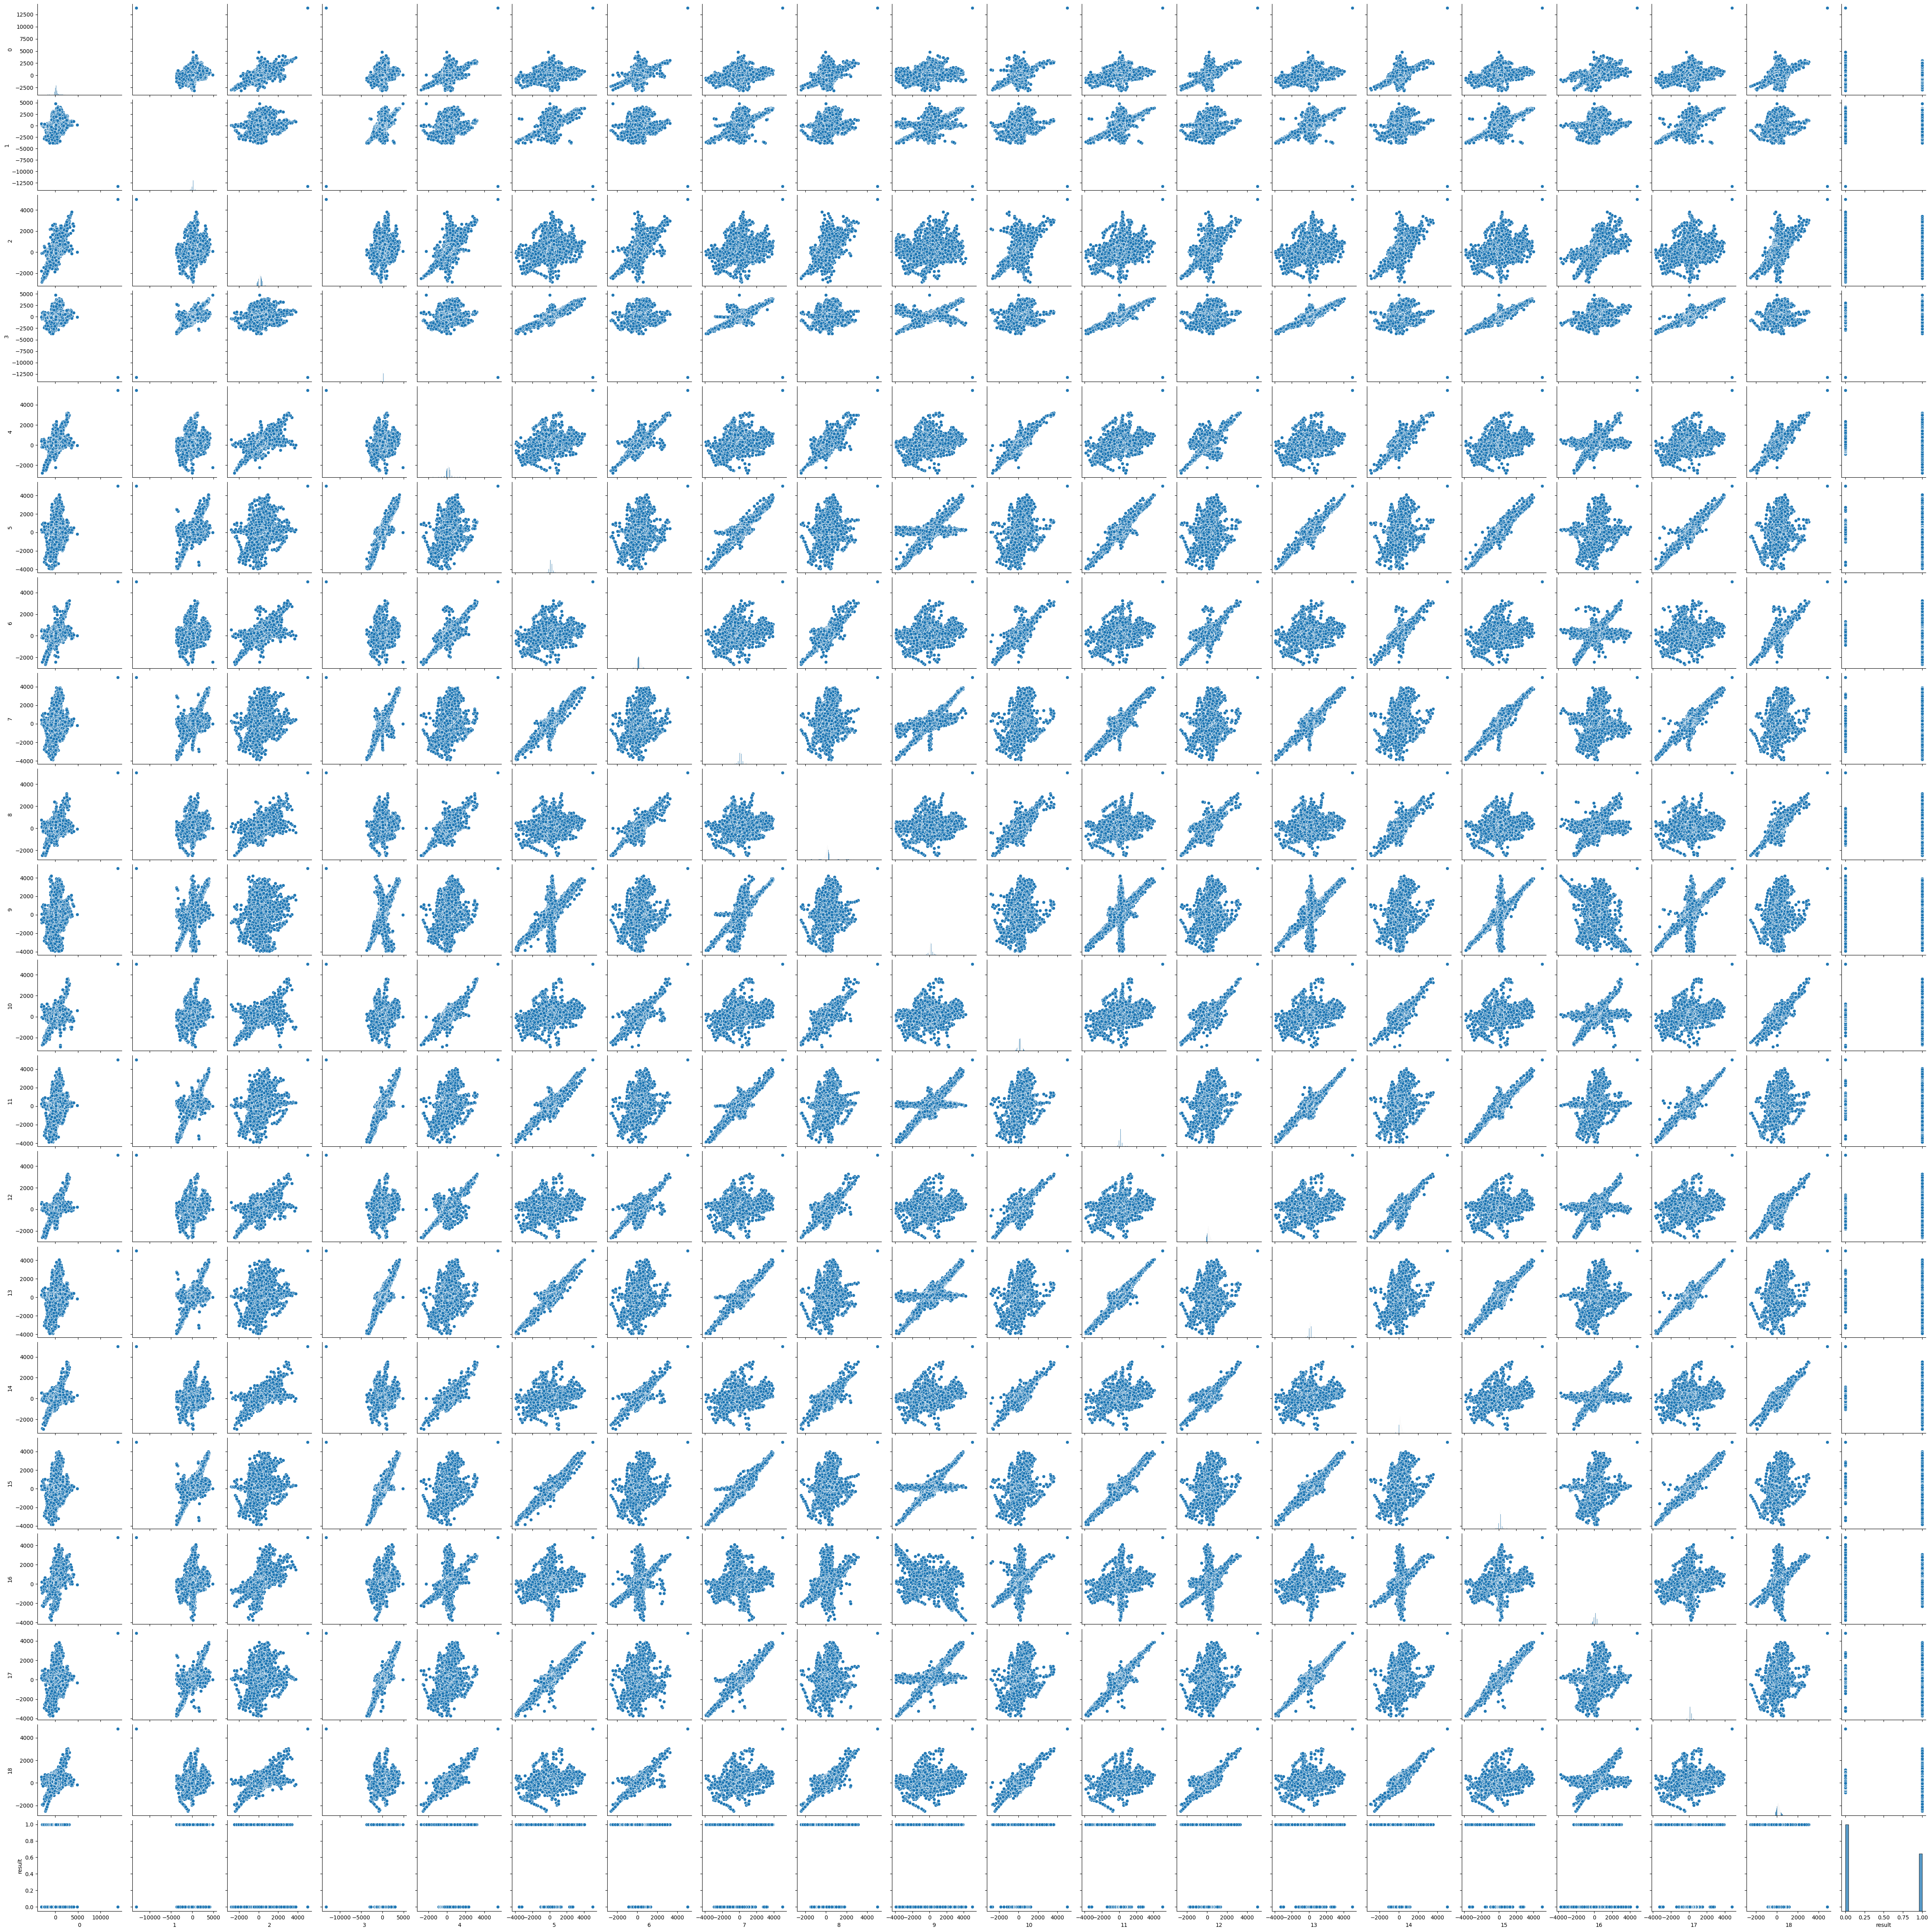

In [ ]:
# correlation in graphicial form
sns.pairplot(df)

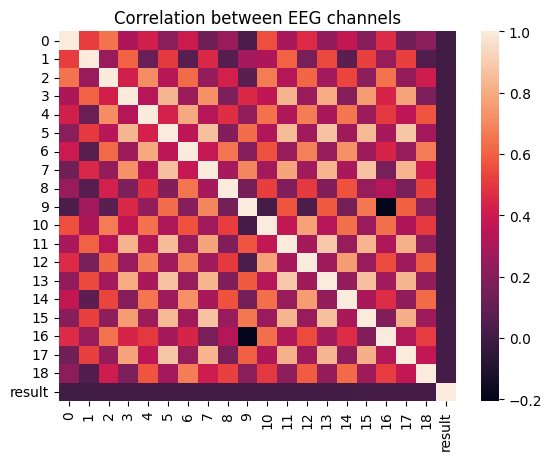

In [ ]:
# Create correlation matrix
corr_matrix = df.corr()

# Create heatmap
sns.heatmap(corr_matrix)

# Add title
plt.title('Correlation between EEG channels')

# Display plot
plt.show()

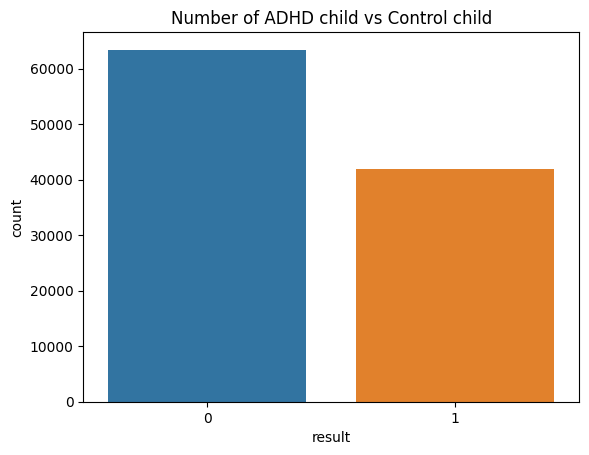

In [ ]:
# visualize the result column
sns.countplot(x='result', data=df)

# Add labels and title
plt.xlabel("result")
plt.ylabel("count")
plt.title("Number of ADHD child vs Control child")

# Display plot
plt.show()

---
<a name = Section7></a>
#**7. Data Prepration for Algorithm**
---

In [ ]:
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [ ]:
# x_normalized = x / np.max(x)
x.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18'],
      dtype='object')

In [ ]:
y=pd.DataFrame(y)
y

result
0            1
1            0
2            0
3            0
4            1
...        ...
105338       1
105339       0
105340       0
105341       0
105342       1

[105343 rows x 1 columns]

In [ ]:
x.head()

0      1      2      3      4      5      6      7      8      9  \
0 -160.0   85.0   16.0  226.0  -20.0  347.0   52.0  310.0   89.0  273.0   
1  613.0  437.0  163.0  261.0 -131.0  163.0 -167.0  200.0  -57.0  236.0   
2 -583.0  437.0 -241.0  -55.0  -20.0  126.0 -278.0   52.0  -94.0  457.0   
3   85.0   50.0   16.0  -19.0  163.0   16.0  200.0  163.0  163.0  163.0   
4  367.0   85.0  310.0  -55.0  420.0 -315.0  236.0  -94.0  236.0  -57.0   

      10     11     12     13     14     15     16     17     18  
0  -94.0  126.0  -57.0  163.0  -94.0  200.0  121.0  297.0  191.0  
1  457.0   52.0  236.0  236.0  -20.0  347.0  -19.0  156.0  -55.0  
2   52.0   16.0  -57.0  126.0   52.0  126.0 -371.0  226.0   15.0  
3   52.0   16.0   89.0  -20.0   89.0   89.0  -19.0  191.0  191.0  
4  310.0  -57.0  347.0  -94.0  310.0  -57.0  261.0  -19.0  226.0

In [ ]:
y.head()

result
0       1
1       0
2       0
3       0
4       1

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
#Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

----
<a name = Section8></a>
# **8. Model Development & Evaluation**
----

* Model development is an iterative process, in which many models are derived, tested and built upon until a model fitting the desired criteria is built.

* Model evaluation is the process of using different evaluation metrics to understand a machine learning model's performance, as well as its strengths and weaknesses.

<a name = Section81></a>
### **8.1 Logistic Regression**

In [ ]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state = 0)
lr_classifier.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [ ]:
y_pred = lr_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[19035,     3],
       [12559,     6]])

In [ ]:
acs = accuracy_score(y_test, y_pred)
acs*100

60.2506091193874

<a name = Section82></a>
### **8.2 KNeighborsClassifier**

In [ ]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
#confusion_matrix
y_pred = knn_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[18208,   830],
       [ 1694, 10871]])

In [ ]:
#accuracy_score
acs = accuracy_score(y_test, y_pred)
acs*100

92.01341644780558

<a name = Section83></a>
### **8.3 GaussianNB**

In [ ]:
#Using GaussianNB method of naive_bayes class to use Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
gnb_classifier = GaussianNB()
gnb_classifier.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
#confusion_matrix
y_pred = gnb_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[16790,  2248],
       [ 9319,  3246]])

In [ ]:
#accuracy_score
acs = accuracy_score(y_test, y_pred)
acs*100

63.39904439451951

<a name = Section84></a>
### **8.4 DecisionTreeClassifier**

In [ ]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#confusion_matrix
y_pred = dt_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[16571,  2467],
       [ 2451, 10114]])

In [ ]:
#accuracy_score
acs = accuracy_score(y_test, y_pred)
acs*100

84.438186248141

<a name = Section85></a>
### **8.5 RandomForestClassifier**

In [ ]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorith
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(x_train, y_train)

<ipython-input-47-cc603be30f30>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
#confusion_matrix
y_pred = rf_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[18296,   742],
       [ 2512, 10053]])

In [ ]:
#accuracy_score
acs = accuracy_score(y_test, y_pred)
acs*100

89.70350916052273